# **Part1**: A first glance at the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "D:\Datasets\YouNiverse"

In [3]:
df_channels = pd.read_csv(data_path + "\df_channels_en.tsv.gz", sep="\t")
df_timeseries = pd.read_csv(data_path + "\df_timeseries_en.tsv.gz", sep="\t")


In [4]:
df_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.0870
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.0870
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.0870
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.0870
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.0870
...,...,...,...,...,...,...,...,...
136465,Music,2016-10-06,UCuM-9AajUOwKw6ipOzu2DRQ,GONE.Fludd - Topic,10128,105,1008139.0,53.1435
136466,People & Blogs,2013-10-17,UCtW9jp5TH0YrgYpwiRf9t-Q,saidthestory,10100,352,1008644.0,53.1435
136467,Gaming,2015-05-08,UCTsxFTIUs8vFDzGccDm6i7Q,Omni H,10000,475,1009505.0,53.1435
136468,Music,2011-04-13,UC1HOArgRCMGPjlcmkThERwA,TĀLĀ,10000,15,1025119.0,53.1435


In [5]:
df_timeseries

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0
...,...,...,...,...,...,...,...,...,...,...
18872494,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-02 00:00:00,6.012938e+06,232418.277778,61268.611111,1305.611111,278,2,10
18872495,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-09 00:00:00,6.244579e+06,231640.888889,62631.666667,1363.055556,287,9,13
18872496,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-16 00:00:00,6.480902e+06,236322.933333,64010.000000,1378.333333,294,7,16
18872497,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-23 00:00:00,6.745317e+06,264415.200000,65480.000000,1470.000000,301,7,15


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['category_cc']
numerical_features = ['videos_cc', 'weights', 'subscriber_rank_sb']

# One-hot encode the categorical variable 'category_cc'
one_hot_encoder = OneHotEncoder()
category_encoded = one_hot_encoder.fit_transform(df_channels[['category_cc']]).toarray()
category_encoded_df = pd.DataFrame(category_encoded, columns=one_hot_encoder.get_feature_names_out(['category_cc']))

# Include the encoded categorical data with the numerical features
X = pd.concat([df_channels[numerical_features], category_encoded_df], axis=1)
y = df_channels['subscribers_cc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reduce the number of estimators to speed up the process
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)

# If the dataset is too large, use a fraction of it to train the model
if len(X_train) > 100000:  # arbitrary threshold for demonstration purposes
    X_train_sample = X_train.sample(n=100000, random_state=42)
    y_train_sample = y_train.loc[X_train_sample.index]
else:
    X_train_sample = X_train
    y_train_sample = y_train

# Train the model on the smaller sample set
rf_model.fit(X_train_sample, y_train_sample)

# Predict the number of subscribers on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(82810601341.35266, 0.9411359554265518)

C:\Users\15712\AppData\Local\Temp\ipykernel_3868\2075055731.py:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_channels.corr()


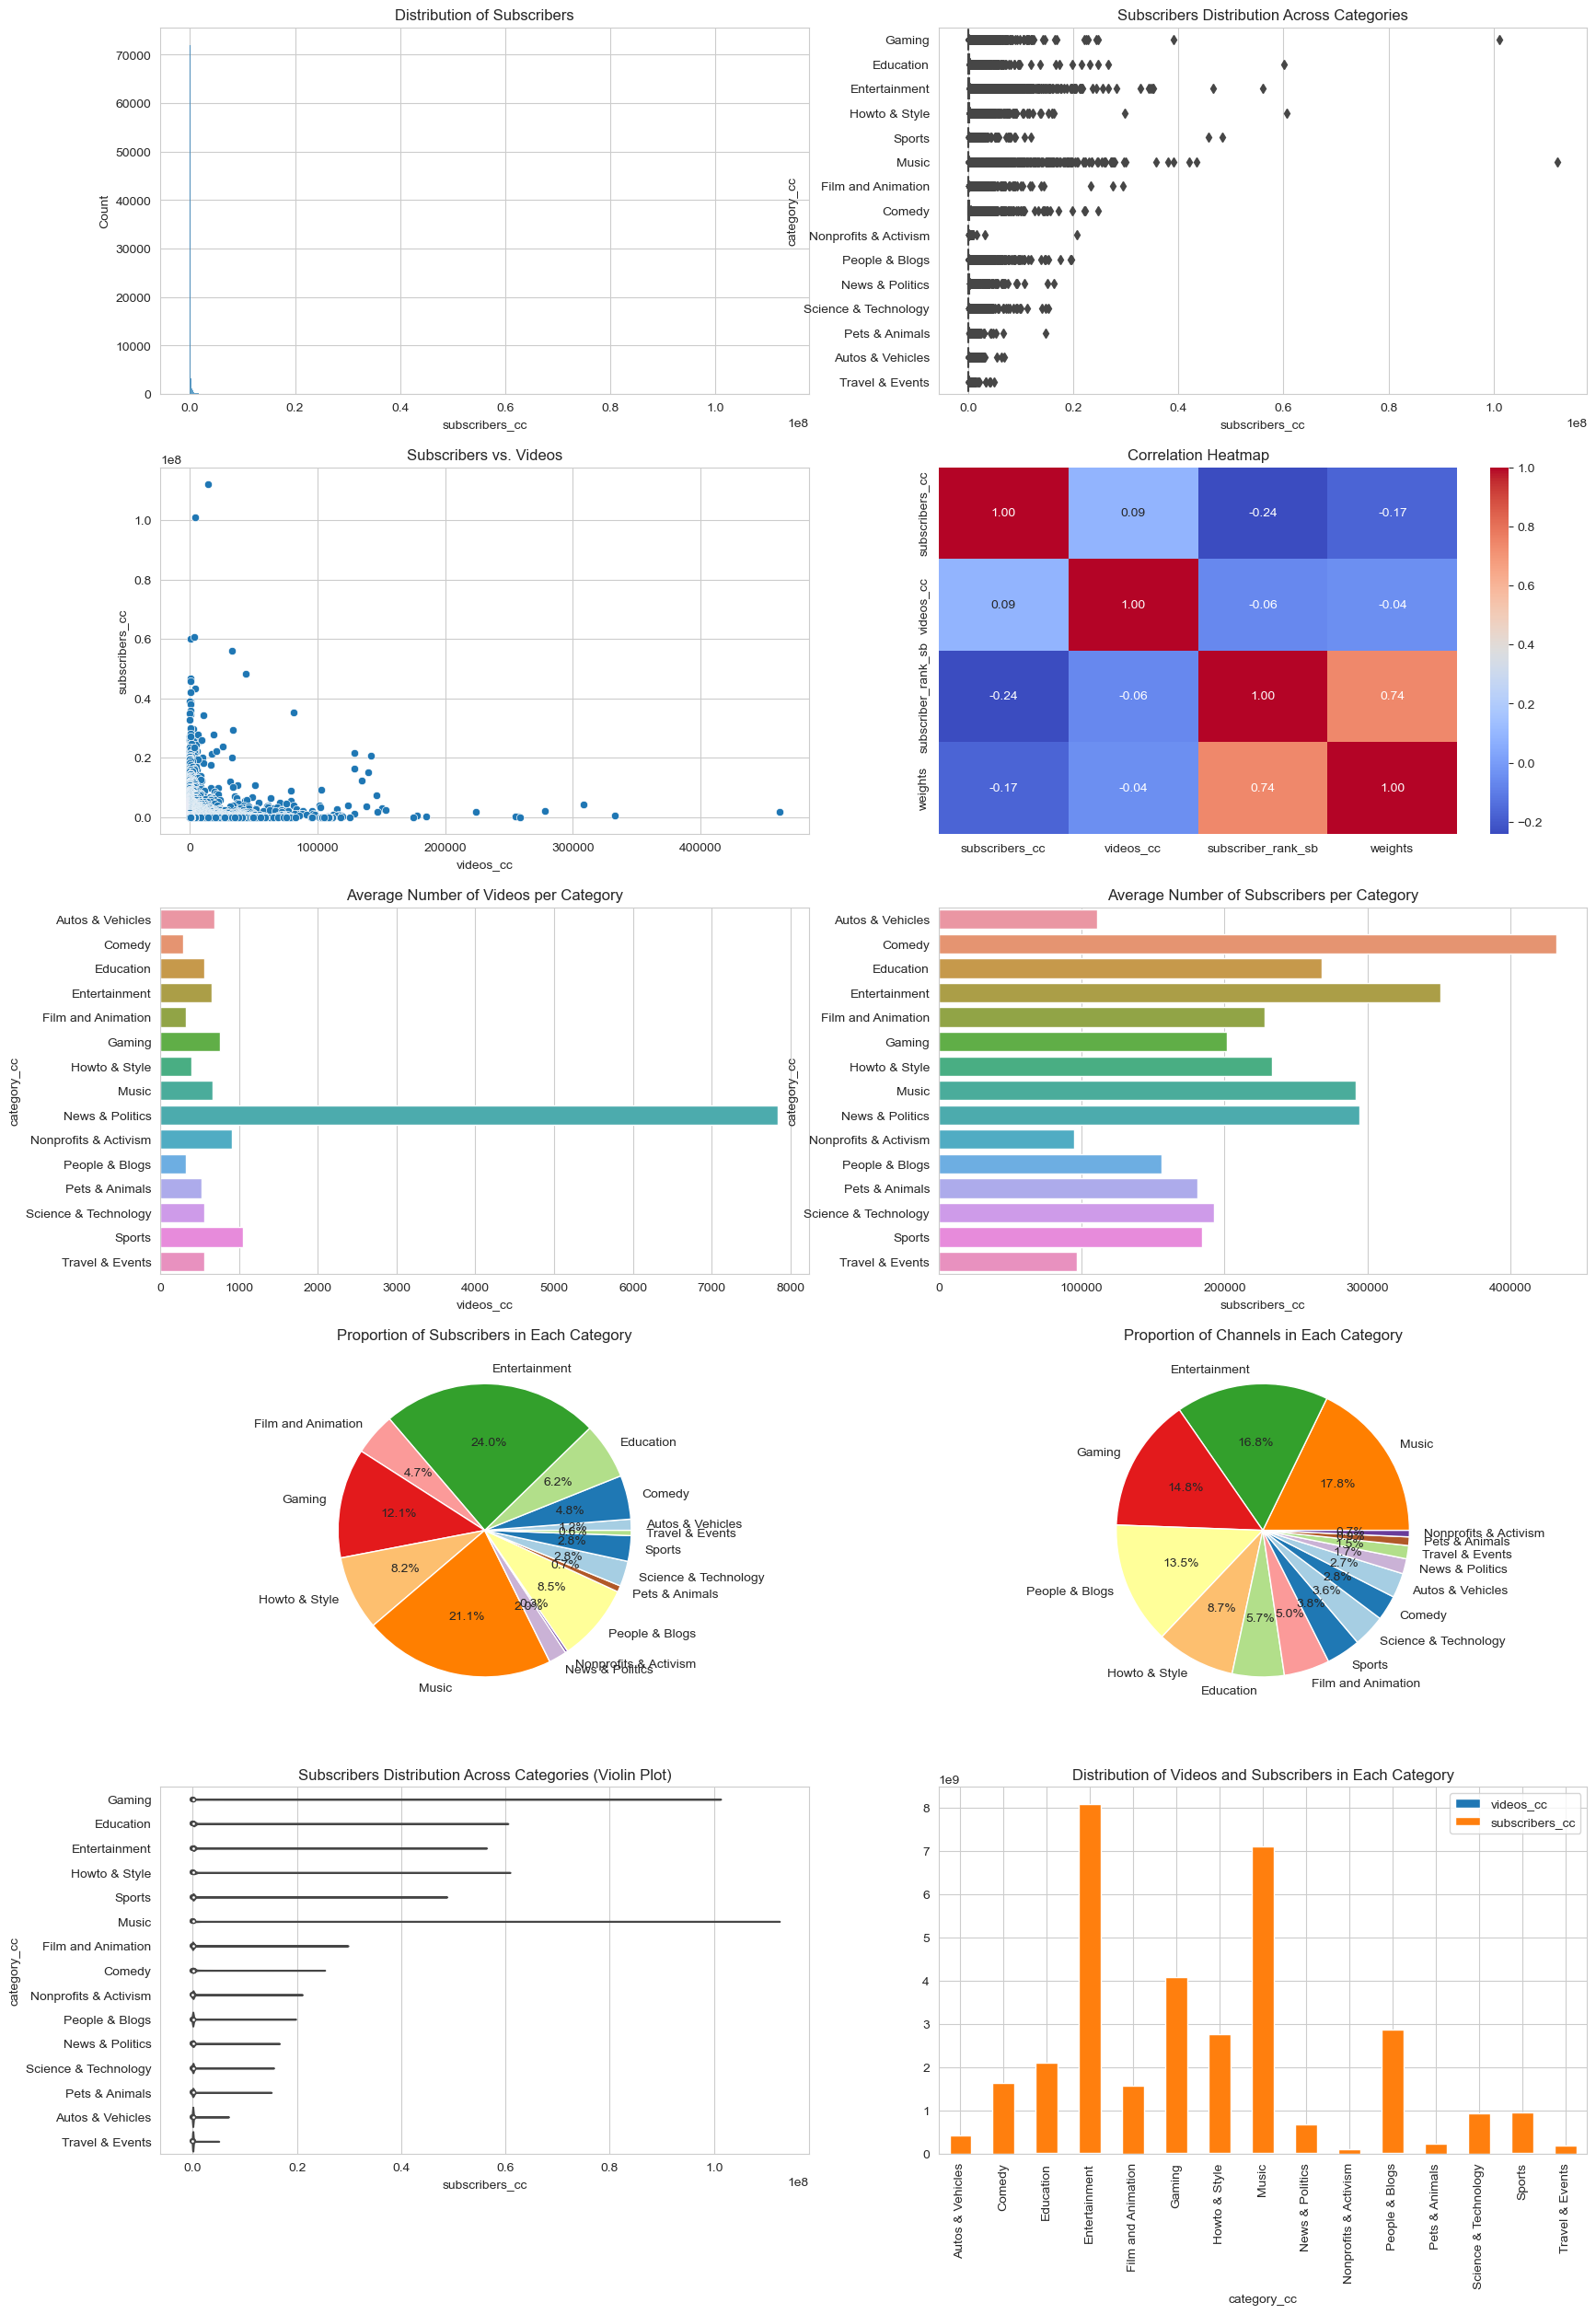

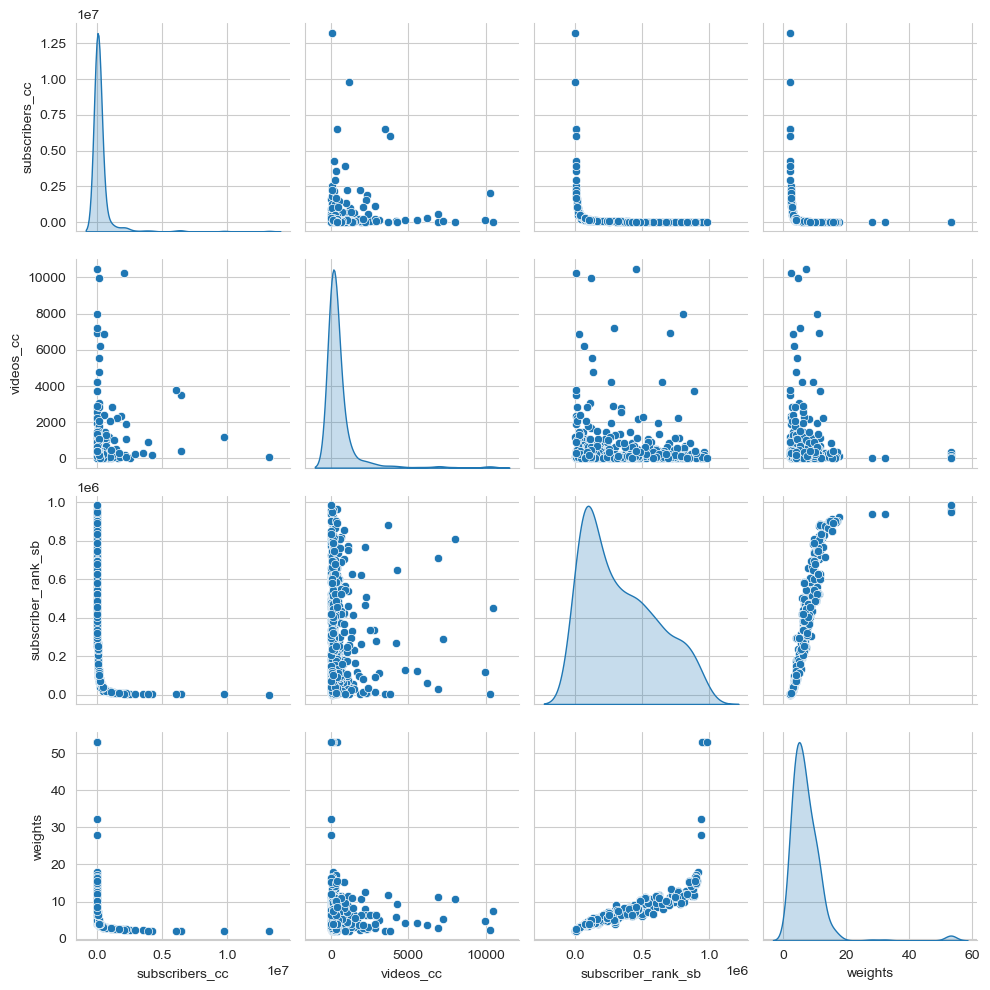

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the figure for the subplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))

# Histogram of subscribers
sns.histplot(df_channels['subscribers_cc'], bins=3000, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Subscribers')

# Boxplot of subscribers across different categories
sns.boxplot(x='subscribers_cc', y='category_cc', data=df_channels, ax=axes[0, 1])
axes[0, 1].set_title('Subscribers Distribution Across Categories')

# Scatter plot of subscribers vs. videos
sns.scatterplot(x='videos_cc', y='subscribers_cc', data=df_channels, ax=axes[1, 0])
axes[1, 0].set_title('Subscribers vs. Videos')

# Correlation heatmap
corr = df_channels.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

# Pairplot for numerical features (sampled due to large size)
sns.pairplot(df_channels.sample(min(500, len(df_channels)), random_state=42), diag_kind='kde')

# Average number of videos and subscribers in each category
category_stats = df_channels.groupby('category_cc').agg({'videos_cc':'mean', 'subscribers_cc':'mean'}).reset_index()
sns.barplot(x='videos_cc', y='category_cc', data=category_stats, ax=axes[2, 0])
axes[2, 0].set_title('Average Number of Videos per Category')

sns.barplot(x='subscribers_cc', y='category_cc', data=category_stats, ax=axes[2, 1])
axes[2, 1].set_title('Average Number of Subscribers per Category')



# The following codes ensure that the same color is used for the same category across all plots
# Filter out NaN values and ensure that all entries are strings
filtered_categories = df_channels['category_cc'].dropna().astype(str)

# Create a sorted list of unique categories
unique_categories = sorted(filtered_categories.unique())

# Create a color palette with a distinct color for each category
colors = sns.color_palette('Paired', len(unique_categories))

# Create a color map (dictionary) for each category
color_map = {category: color for category, color in zip(unique_categories, colors)}



# Pie chart for proportion of subscribers in each category
category_subscribers = df_channels.groupby('category_cc')['subscribers_cc'].sum()
axes[3, 0].pie(category_subscribers, labels=category_subscribers.index, autopct='%1.1f%%', colors=[color_map[cat] for cat in category_subscribers.index])
axes[3, 0].set_title('Proportion of Subscribers in Each Category')

# Pie chart for proportion of channels in each category
category_counts = df_channels['category_cc'].value_counts()
axes[3, 1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=[color_map[cat] for cat in category_counts.index])
axes[3, 1].set_title('Proportion of Channels in Each Category')

# Violin plot for subscribers across different categories
sns.violinplot(x='subscribers_cc', y='category_cc', data=df_channels, ax=axes[4, 0])
axes[4, 0].set_title('Subscribers Distribution Across Categories (Violin Plot)')

# Stacked bar chart for distribution of videos and subscribers in each category
category_grouped = df_channels.groupby('category_cc').agg({'videos_cc':'sum', 'subscribers_cc':'sum'})
category_grouped.plot(kind='bar', stacked=True, ax=axes[4, 1])
axes[4, 1].set_title('Distribution of Videos and Subscribers in Each Category')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


At first glance, it seems that `subscribers` vs `videos` graph follows a power law distribution. Let's check it out.

In [12]:
from sklearn.linear_model import LinearRegression

# Determine the 95th percentile of subscribers
percentile_95 = np.percentile(df_channels['subscribers_cc'], 95)

# Filter the dataset for channels that have subscriber counts above the 95th percentile
upper_bound_data = df_channels[df_channels['subscribers_cc'] >= percentile_95]

# Log-transform the upper bound data
log_subscribers_upper = np.log(upper_bound_data['subscribers_cc'] + 1)
log_videos_upper = np.log(upper_bound_data['videos_cc'] + 1)

# Reshape the data for sklearn
X_upper = log_videos_upper.values.reshape(-1, 1)
y_upper = log_subscribers_upper.values.reshape(-1, 1)

# Create and fit the model for the upper bound data
model_upper = LinearRegression()
model_upper.fit(X_upper, y_upper)

# Get the coefficient (k) and the intercept (log(a)) for the upper bound model
k_upper = model_upper.coef_[0][0]
log_a_upper = model_upper.intercept_[0]

# Calculate the R-squared value to assess the fit for the upper bound model
r_squared_upper = model_upper.score(X_upper, y_upper)

# Convert log(a) back to a for the upper bound model
a_upper = np.exp(log_a_upper)

# Return the model parameters and R-squared value for the upper bound
a_upper, k_upper, r_squared_upper, percentile_95

(1438047.5599822202,
 0.061682834382706615,
 0.01912954313949633,
 909759.6499999992)

- The exponent $k$ for the upper bound is approximately 0.0617.

The $R^2$ value for the upper bound model is approximately 0.0191, which is even lower than the model for the entire dataset. This lower $R^2$ value indicates that the power-law model explains an even smaller portion of the variance within the upper bound of the data.

Or, if we want to visualize the data in a log-log plot, we can see that the data points are not linearly distributed. 
![log-logGraph](\plots\graph1.png)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_timeseries is your time-series data with columns as specified
# Scaling the 'subs' column from df_timeseries
scaler = MinMaxScaler(feature_range=(-1, 1))
df_timeseries['scaled_subs'] = scaler.fit_transform(df_timeseries['subs'].values.reshape(-1,1))

# We create sequences of data for the LSTM
def create_sequences(input_data, time_steps):
    inout_seq = []
    L = len(input_data)
    for i in range(L - time_steps):
        train_seq = input_data[i:i + time_steps]
        train_label = input_data[i + time_steps:i + time_steps + 1]
        inout_seq.append((train_seq, train_label))
    return inout_seq

time_steps = 5  # For example, using 5 days of data to predict the 6th day
df_timeseries_sorted = df_timeseries.sort_values(by=['channel', 'datetime'])
sequences = df_timeseries_sorted.groupby('channel')['scaled_subs'].apply(lambda x: create_sequences(x.tolist(), time_steps))
sequences = [item for sublist in sequences for item in sublist]  # Flatten the list

# Splitting the data into features and targets
X, y = zip(*sequences)
X = np.array(X).reshape(-1, time_steps, 1)
y = np.array(y).reshape(-1, 1)

# Convert the data to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Create the DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=64, shuffle=False)

# LSTM Model
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        predictions = self.linear(lstm_out[:, -1, :])  # Take the last time step only
        return predictions

# Instantiate the model, define the loss function and the optimizer
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 5
loss_history = []
for epoch in range(epochs):
    model.train()
    for i, (seq, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(seq)
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()
        loss_history.append(single_loss.item())
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {single_loss.item():.4f}')

    # Optionally, add code to evaluate the model on a validation set here

# Visualize the training progress
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

